In [94]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [95]:
pwd

'/content/gdrive/My Drive/AI/experiment/DrivingHelper'

In [93]:
cd gdrive/MyDrive/AI/experiment/DrivingHelper/

[Errno 2] No such file or directory: 'gdrive/MyDrive/AI/experiment/DrivingHelper/'
/content/gdrive/MyDrive/AI/experiment/DrivingHelper


In [3]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from os import listdir

import tensorflow as tf

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

from keras.optimizers import Adam
from keras.models import load_model
from keras.callbacks import ModelCheckpoint
from sklearn.preprocessing import MinMaxScaler

## WHOLE LANES

In [322]:
#### WITTHOUT SETTING NUMBER OF EACH CORNERS ####
#### FINALQ
##only 19 

beginner_path = 'beginner_expert_processedData/beginner/beginner_'
expert_path = 'beginner_expert_processedData/expert/expert_'
left_column = [
#'Time','Distance','Corr Dist','Corr Dist (Unstretched)','Session Time Left',
'GPS Latitude','GPS Longitude','Damper Velocity (Calc) FL','Damper Velocity (Calc) FR','Damper Velocity (Calc) RL',
'Damper Velocity (Calc) RR','Corr Speed','Brake Pos',
'CG Accel Lateral','CG Accel Longitudinal','CG Accel Vertical','CG Height','Camber FL','Camber FR','Camber RL','Camber RR','Car Coord X',
'Car Coord Y','Car Coord Z','Car Pos Norm','Chassis Pitch Angle','Chassis Pitch Rate','Chassis Roll Angle','Chassis Roll Rate',
'Chassis Velocity X','Chassis Velocity Y','Chassis Velocity Z','Chassis Yaw Rate','Drive Train Speed','Engine RPM','Ground Speed',
'Ride Height FL','Ride Height FR','Ride Height RL','Ride Height RR','Road Temp','Self Align Torque FL','Self Align Torque FR',
'Self Align Torque RL','Self Align Torque RR','Steering Angle','Suspension Travel FL','Suspension Travel FR',
'Suspension Travel RL','Suspension Travel RR','Tire Load FL','Tire Load FR','Tire Load RL','Tire Load RR','Tire Loaded Radius FL',
'Tire Loaded Radius FR','Tire Loaded Radius RL','Tire Loaded Radius RR','Tire Pressure FL','Tire Pressure FR','Tire Pressure RL','Tire Pressure RR',
'Tire Rubber Grip FL','Tire Rubber Grip FR','Tire Rubber Grip RL','Tire Rubber Grip RR','Tire Slip Angle FL','Tire Slip Angle FR',
'Tire Slip Angle RL','Tire Slip Angle RR','Tire Slip Ratio FL','Tire Slip Ratio FR','Tire Slip Ratio RL','Tire Slip Ratio RR',
'Tire Temp Core FL','Tire Temp Core FR','Tire Temp Core RL','Tire Temp Core RR','Tire Temp Inner FL','Tire Temp Inner FR',
'Tire Temp Inner RL','Tire Temp Inner RR','Tire Temp Middle FL','Tire Temp Middle FR','Tire Temp Middle RL',
'Tire Temp Middle RR','Tire Temp Outer FL','Tire Temp Outer FR','Tire Temp Outer RL','Tire Temp Outer RR','Toe In FL',
'Toe In FR','Toe In RL','Toe In RR','Wheel Angular Speed FL','Wheel Angular Speed FR','Wheel Angular Speed RL','Wheel Angular Speed RR',
'CG Distance','Lateral Velocity','Longitudinal Velocity','Lateral Acceleration','Longitudinal Acceleration']

part_column = ['Brake Pos', 'Ground Speed', 'Steering Angle', 'Throttle Pos', 'Chassis Yaw Rate', 'Chassis Velocity X', 
               'Chassis Velocity Y','Chassis Velocity Z','Lateral Velocity','Longitudinal Velocity','Lateral Acceleration','Longitudinal Acceleration', 
               'CG Distance']

curveList = [[103.9, 209.3], [316.6, 399.6], [425.3, 517.9], [590.5, 756.9], [1048.7, 1110.5], [1212.3, 1437.1]]
curve_num = 0
sequences = list()
final_df = pd.DataFrame()
for i in range(1,20):
    final_df = pd.DataFrame()
    file_path = beginner_path + str(i) + '_new2.csv'
    #print(file_path)
    df = pd.read_csv(file_path, header=0)
    df = df.dropna()
    df = df.astype(float)

    for j in range(0, 6):
      tmp_df = df[(df['Distance'] >= curveList[j][0]) & (df['Distance'] <= curveList[j][1])]
      #print(tmp_df)
      tmp_df = tmp_df.loc[:,left_column]
      #tmp_df = tmp_df.loc[:,part_column]
      tmp_df['curve_num'] = j
      #final_df = final_df.append(tmp_df, ignore_index=True)
      values = tmp_df.values
      #scaler = MinMaxScaler(feature_range=(0, 1))
      #scaled = scaler.fit_transform(values)
      sequences.append(values)

    
for i in range(1,20):
    final_df = pd.DataFrame()
    file_path = expert_path + str(i) + '_new2.csv'
    #print(file_path)
    df = pd.read_csv(file_path, header=0)
    df = df.dropna()
    df = df.astype(float)
    for j in range(0, 6):
      tmp_df = df[(df['Distance'] >= curveList[j][0]) & (df['Distance'] <= curveList[j][1])]
      tmp_df = tmp_df.loc[:,left_column]
      #tmp_df = tmp_df.loc[:,part_column]
      tmp_df['curve_num'] = j
      values = tmp_df.values
      #scaler = MinMaxScaler(feature_range=(0, 1))
      #scaled = scaler.fit_transform(values)
      sequences.append(values)
    

## EACH LANES

In [257]:
#### WITTHOUT SETTING NUMBER OF EACH CORNERS ####
#### FINALQ
##only 19 

beginner_path = 'beginner_expert_processedData/beginner/beginner_'
expert_path = 'beginner_expert_processedData/expert/expert_'
left_column = [
#'Time','Distance','Corr Dist','Corr Dist (Unstretched)','Session Time Left',
'GPS Latitude','GPS Longitude','Damper Velocity (Calc) FL','Damper Velocity (Calc) FR','Damper Velocity (Calc) RL',
'Damper Velocity (Calc) RR','Corr Speed','Brake Pos',
'CG Accel Lateral','CG Accel Longitudinal','CG Accel Vertical','CG Height','Camber FL','Camber FR','Camber RL','Camber RR','Car Coord X',
'Car Coord Y','Car Coord Z','Car Pos Norm','Chassis Pitch Angle','Chassis Pitch Rate','Chassis Roll Angle','Chassis Roll Rate',
'Chassis Velocity X','Chassis Velocity Y','Chassis Velocity Z','Chassis Yaw Rate','Drive Train Speed','Engine RPM','Ground Speed',
'Ride Height FL','Ride Height FR','Ride Height RL','Ride Height RR','Road Temp','Self Align Torque FL','Self Align Torque FR',
'Self Align Torque RL','Self Align Torque RR','Steering Angle','Suspension Travel FL','Suspension Travel FR',
'Suspension Travel RL','Suspension Travel RR','Tire Load FL','Tire Load FR','Tire Load RL','Tire Load RR','Tire Loaded Radius FL',
'Tire Loaded Radius FR','Tire Loaded Radius RL','Tire Loaded Radius RR','Tire Pressure FL','Tire Pressure FR','Tire Pressure RL','Tire Pressure RR',
'Tire Rubber Grip FL','Tire Rubber Grip FR','Tire Rubber Grip RL','Tire Rubber Grip RR','Tire Slip Angle FL','Tire Slip Angle FR',
'Tire Slip Angle RL','Tire Slip Angle RR','Tire Slip Ratio FL','Tire Slip Ratio FR','Tire Slip Ratio RL','Tire Slip Ratio RR',
'Tire Temp Core FL','Tire Temp Core FR','Tire Temp Core RL','Tire Temp Core RR','Tire Temp Inner FL','Tire Temp Inner FR',
'Tire Temp Inner RL','Tire Temp Inner RR','Tire Temp Middle FL','Tire Temp Middle FR','Tire Temp Middle RL',
'Tire Temp Middle RR','Tire Temp Outer FL','Tire Temp Outer FR','Tire Temp Outer RL','Tire Temp Outer RR','Toe In FL',
'Toe In FR','Toe In RL','Toe In RR','Wheel Angular Speed FL','Wheel Angular Speed FR','Wheel Angular Speed RL','Wheel Angular Speed RR',
'CG Distance','Lateral Velocity','Longitudinal Velocity','Lateral Acceleration','Longitudinal Acceleration']

part_column = ['Brake Pos', 'Ground Speed', 'Steering Angle', 'Throttle Pos', 'Chassis Yaw Rate', 'Chassis Velocity X', 
               'Chassis Velocity Y','Chassis Velocity Z','Lateral Velocity','Longitudinal Velocity','Lateral Acceleration','Longitudinal Acceleration', 
               'CG Distance']

curveList = [[103.9, 209.3], [316.6, 399.6], [425.3, 517.9], [590.5, 756.9], [1048.7, 1110.5], [1212.3, 1437.1]]
curve_num = 0
sequences = list()
final_df = pd.DataFrame()
j = 5
for i in range(1,20):
    final_df = pd.DataFrame()
    file_path = beginner_path + str(i) + '_new2.csv'
    #print(file_path)
    df = pd.read_csv(file_path, header=0)
    df = df.dropna()
    df = df.astype(float)
    tmp_df = df[(df['Distance'] >= curveList[j][0]) & (df['Distance'] <= curveList[j][1])]
    #print(tmp_df)
    #tmp_df = tmp_df.loc[:,left_column]
    tmp_df = tmp_df.loc[:,part_column]
    #tmp_df['curve_num'] = j
    #final_df = final_df.append(tmp_df, ignore_index=True)
    values = tmp_df.values
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled = scaler.fit_transform(values)
    sequences.append(values)

    
for i in range(1,20):
    final_df = pd.DataFrame()
    file_path = expert_path + str(i) + '_new2.csv'
    #print(file_path)
    df = pd.read_csv(file_path, header=0)
    df = df.dropna()
    df = df.astype(float)
    tmp_df = df[(df['Distance'] >= curveList[j][0]) & (df['Distance'] <= curveList[j][1])]
    #tmp_df = tmp_df.loc[:,left_column]
    tmp_df = tmp_df.loc[:,part_column]
    #tmp_df['curve_num'] = j
    values = tmp_df.values
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled = scaler.fit_transform(values)
    sequences.append(values)
    

In [323]:

print(len(sequences))
print(sequences[1].shape)

228
(46, 99)


In [79]:
targets = pd.read_csv('target.csv')
targets = targets.values[:,1]
groups = pd.read_csv('group.csv', header=0)
groups = groups.values[:,1]

In [324]:
len_sequences = []
for one_seq in sequences:
    len_sequences.append(len(one_seq))
    
print(len_sequences)
pd.Series(len_sequences).describe()

[72, 46, 492, 111, 28, 125, 71, 57, 214, 98, 27, 148, 78, 49, 318, 105, 26, 151, 91, 43, 311, 88, 27, 146, 68, 50, 429, 115, 31, 129, 69, 54, 102, 105, 31, 147, 75, 61, 73, 112, 30, 145, 84, 58, 77, 95, 30, 131, 76, 50, 124, 94, 34, 145, 79, 51, 94, 108, 30, 146, 97, 59, 121, 127, 41, 154, 102, 68, 218, 140, 36, 150, 101, 50, 833, 135, 37, 194, 89, 48, 695, 99, 33, 156, 63, 69, 110, 97, 36, 183, 74, 59, 90, 86, 29, 136, 80, 60, 80, 90, 28, 142, 69, 48, 329, 111, 31, 121, 78, 52, 73, 97, 25, 494, 68, 51, 71, 87, 25, 123, 64, 45, 68, 86, 26, 132, 64, 46, 69, 86, 26, 124, 71, 50, 67, 84, 26, 125, 68, 53, 68, 81, 27, 117, 65, 48, 81, 81, 25, 126, 66, 47, 69, 111, 25, 129, 66, 46, 69, 88, 26, 119, 67, 44, 72, 80, 26, 126, 66, 45, 77, 78, 25, 122, 72, 52, 69, 77, 25, 133, 66, 47, 70, 77, 25, 126, 67, 45, 79, 84, 25, 128, 70, 46, 71, 80, 26, 125, 68, 47, 78, 77, 25, 138, 62, 47, 69, 79, 25, 117, 68, 43, 113, 79, 25, 127, 66, 44, 77, 80, 25, 133, 72, 43, 76, 84, 25, 131]


count    228.000000
mean      92.622807
std       90.949508
min       25.000000
25%       48.750000
50%       73.000000
75%      111.000000
max      833.000000
dtype: float64

In [326]:
#Padding the sequence with the values in last row to max length
#to_pad = 1816
to_pad = 833
new_seq = []
for one_seq in sequences:
    len_one_seq = len(one_seq)
    last_val = one_seq[-1]
    n = to_pad - len_one_seq
   
    to_concat = np.repeat(one_seq[-1], n).reshape(99, n).transpose()
    new_one_seq = np.concatenate([one_seq, to_concat])
    new_seq.append(new_one_seq)
final_seq = np.stack(new_seq)

#truncate the sequence to length 60
from keras.preprocessing import sequence
seq_len = 25
final_seq=sequence.pad_sequences(final_seq, maxlen=seq_len, padding='post', dtype='float', truncating='post')

In [130]:
len(final_seq)

38

## FOR EACH LANE

In [260]:
# Modifying Sequence

train = [final_seq[i] for i in range(len(final_seq)) if (groups[i]==1)]
validation = [final_seq[i] for i in range(len(final_seq)) if groups[i]==2]
test = [final_seq[i] for i in range(len(final_seq)) if groups[i]==3]

train_target = [targets[i] for i in range(len(final_seq)) if (groups[i]==1)]
validation_target = [targets[i] for i in range(len(final_seq)) if groups[i]==2]
test_target = [targets[i] for i in range(len(final_seq)) if groups[i]==3]

train

[array([[ 100.        ,  146.3       ,    8.        , ...,  -10.80305127,
          -14.40406911,    1.8414125 ],
        [ 100.        ,  143.        ,    7.8       , ...,   -7.20203456,
          -21.6061031 ,    1.81532366],
        [ 100.        ,  139.8       ,    6.7       , ...,  -32.40915408,
          -61.2172906 ,    1.79348822],
        ...,
        [   0.        ,  142.6       ,   29.2       , ...,   25.20711981,
           43.21220563,    1.08724422],
        [   0.        ,  142.1       ,   29.        , ..., -100.82847924,
           18.00508497,    1.30873985],
        [   0.        ,  141.7       ,   27.6       , ...,  -61.21729117,
           32.40915351,    1.25849116]]),
 array([[100.        , 112.1       ,  26.8       , ...,  10.80305127,
         -36.01017165,   1.79134028],
        [100.        , 109.3       ,  21.7       , ...,  -7.20203427,
         -61.2172906 ,   1.7759786 ],
        [100.        , 106.4       ,  19.2       , ..., -14.40406854,
         -64.81

## ENTIRE LANE

In [327]:
# Modifying Sequence

train = [final_seq[i] for i in range(len(final_seq)) if (groups[int(i/6)]==1)]
validation = [final_seq[i] for i in range(len(final_seq)) if groups[int(i/6)]==2]
test = [final_seq[i] for i in range(len(final_seq)) if groups[int(i/6)]==3]

train_target = [targets[int(i/6)] for i in range(len(final_seq)) if (groups[int(i/6)]==1)]
validation_target = [targets[int(i/6)] for i in range(len(final_seq)) if groups[int(i/6)]==2]
test_target = [targets[int(i/6)] for i in range(len(final_seq)) if groups[int(i/6)]==3]

train

[array([[ 4.40537143e+01, -7.86816904e+01,  1.84000000e+01, ...,
         -1.80050858e+01,  2.16061025e+01,  0.00000000e+00],
        [ 4.40536929e+01, -7.86816838e+01,  2.04300000e+02, ...,
         -1.54843736e+02, -2.16061031e+01,  0.00000000e+00],
        [ 4.40536742e+01, -7.86816780e+01, -3.05800000e+02, ...,
         -1.11631530e+02, -7.20203456e+00,  0.00000000e+00],
        ...,
        [ 4.40533646e+01, -7.86815540e+01, -5.10000000e+01, ...,
         -1.08030513e+02, -1.08030516e+01,  0.00000000e+00],
        [ 4.40533533e+01, -7.86815475e+01, -7.73000000e+01, ...,
         -2.88081371e+01,  3.60101711e+01,  0.00000000e+00],
        [ 4.40533424e+01, -7.86815409e+01,  1.29500000e+02, ...,
          2.84511827e-07,  5.40152566e+01,  0.00000000e+00]]),
 array([[ 4.40535036e+01, -7.86801855e+01,  5.79000000e+01, ...,
         -2.84511756e-07,  1.80050855e+01,  1.00000000e+00],
        [ 4.40535081e+01, -7.86801700e+01,  1.33000000e+02, ...,
         -1.08030516e+01, -1.44040691e

In [328]:
train = np.array(train)
validation = np.array(validation)
test = np.array(test)

train_target = np.array(train_target)
validation_target = np.array(validation_target)
test_target = np.array(test_target)

print(train.shape)
print(train_target.shape)

(156, 25, 99)
(156,)


In [19]:
!pip install keras-tuner
from kerastuner import HyperModel
from kerastuner.tuners import RandomSearch
from tensorflow import keras

     |████████████████████████████████| 71kB 3.8MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2-cp37-none-any.whl size=78935 sha256=c1672e1b7a92b264929602191e481c5821b087c0bb667bf1e714618aac902592
  Stored in directory: /root/.cache/pip/wheels/bb/a1/8a/7c3de0efb3707a1701b36ebbfdbc4e67aedf6d4943a1f463d6
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp37-none-any.whl size=15356 sha256=086c4711475c0dc2903be7a9d3e5bdb8abf1897a6d9ede4dbb8992624c1eb77c
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [329]:
from tensorflow.keras.models import Sequential
#alpha?
def build_model(hp):
  model = Sequential()
  model.add(LSTM(units=hp.Int('units', min_value=32, max_value=1024, default=256, step=2), input_shape=(seq_len, 104)))
  model.add(Dropout(rate=hp.Float('dropout', min_value=0.0, max_value=0.5, default=0.25, step=0.05)))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer=Adam(
      hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
  ), metrics=['accuracy'])
  return model

tuner=RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=15,
    executions_per_trial=2,
    directory='my_dir',
    project_name='PARTdriverLSTM.....alllll'
    #project_name='driverLSTM_mod'
)

callback= tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)
tuner.search(train, train_target, epochs=70, validation_data=(validation,validation_target), callbacks=[callback])
tuner.results_summary()

Trial 15 Complete [00h 00m 06s]
val_accuracy: 1.0

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 01m 45s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


Results summary
Results in my_dir/PARTdriverLSTM.....alllll
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
units: 524
dropout: 0.0
learning_rate: 0.01
Score: 1.0
Trial summary
Hyperparameters:
units: 826
dropout: 0.2
learning_rate: 0.001
Score: 1.0
Trial summary
Hyperparameters:
units: 562
dropout: 0.45
learning_rate: 0.01
Score: 1.0
Trial summary
Hyperparameters:
units: 794
dropout: 0.45
learning_rate: 0.01
Score: 1.0
Trial summary
Hyperparameters:
units: 324
dropout: 0.15000000000000002
learning_rate: 0.0001
Score: 1.0
Trial summary
Hyperparameters:
units: 306
dropout: 0.45
learning_rate: 0.01
Score: 1.0
Trial summary
Hyperparameters:
units: 254
dropout: 0.25
learning_rate: 0.001
Score: 1.0
Trial summary
Hyperparameters:
units: 434
dropout: 0.35000000000000003
learning_rate: 0.01
Score: 1.0
Trial summary
Hyperparameters:
units: 870
dropout: 0.5
learning_rate: 0.0001
Score: 1.0
Trial summary
Hyperparameters:
units: 252
dropout: 0.

In [330]:
hypmodel = tuner.get_best_models(1)[0]
best_hps = tuner.get_best_hyperparameters(1)[0]
print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal dropout value and learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")


The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 524 and the optimal dropout value and learning rate for the optimizer
is 0.01.



In [336]:

history = hypmodel.fit(train, train_target, epochs=200, batch_size=128, callbacks=[chk], validation_data=(validation,validation_target))


Epoch 1/200
2/2 [==============================] - 0s 55ms/step - loss: 0.4004 - accuracy: 0.8526 - val_loss: 0.1474 - val_accuracy: 1.0000


Epoch 2/200
2/2 [==============================] - 0s 27ms/step - loss: 0.4034 - accuracy: 0.8526 - val_loss: 0.1985 - val_accuracy: 0.9722


Epoch 3/200
2/2 [==============================] - 0s 25ms/step - loss: 0.4166 - accuracy: 0.8462 - val_loss: 0.1384 - val_accuracy: 1.0000


Epoch 4/200
2/2 [==============================] - 0s 28ms/step - loss: 0.4164 - accuracy: 0.8526 - val_loss: 0.0812 - val_accuracy: 1.0000


Epoch 5/200
2/2 [==============================] - 0s 28ms/step - loss: 0.4278 - accuracy: 0.8526 - val_loss: 0.2190 - val_accuracy: 0.9722


Epoch 6/200
2/2 [==============================] - 0s 29ms/step - loss: 0.4125 - accuracy: 0.8526 - val_loss: 0.2424 - val_accuracy: 0.9722


Epoch 7/200
2/2 [==============================] - 0s 26ms/step - loss: 0.4130 - accuracy: 0.8526 - val_loss: 0.1181 - val_accuracy: 1.0000


Epoch 8/200
2/2 [==============================] - 0s 29ms/step - loss: 0.4093 - accuracy: 0.8526 - val_loss: 0.1494 - val_accuracy: 1.0000


Epoch 9/200
2/2 [==============================] - 0s 26ms/step - loss: 0.4015 - accuracy: 0.8526 - val_loss: 0.2374 - val_accuracy: 0.9722


Epoch 10/200
2/2 [==============================] - 0s 24ms/step - loss: 0.4088 - accuracy: 0.8526 - val_loss: 0.1479 - val_accuracy: 1.0000


Epoch 11/200
2/2 [==============================] - 0s 25ms/step - loss: 0.4128 - accuracy: 0.8526 - val_loss: 0.1282 - val_accuracy: 1.0000


Epoch 12/200
2/2 [==============================] - 0s 27ms/step - loss: 0.3997 - accuracy: 0.8526 - val_loss: 0.2952 - val_accuracy: 0.9722


Epoch 13/200
2/2 [==============================] - 0s 26ms/step - loss: 0.4334 - accuracy: 0.8462 - val_loss: 0.2108 - val_accuracy: 0.9722


Epoch 14/200
2/2 [==============================] - 0s 26ms/step - loss: 0.3968 - accuracy: 0.8526 - val_loss: 0.0682 - val_accuracy: 1.0000


Epoch 15/200
2/2 [==============================] - 0s 28ms/step - loss: 0.4534 - accuracy: 0.8526 - val_loss: 0.0678 - val_accuracy: 1.0000


Epoch 16/200
2/2 [==============================] - 0s 25ms/step - loss: 0.4417 - accuracy: 0.8526 - val_loss: 0.2089 - val_accuracy: 0.9722


Epoch 17/200
2/2 [==============================] - 0s 40ms/step - loss: 0.4039 - accuracy: 0.8462 - val_loss: 0.3529 - val_accuracy: 0.9722


Epoch 18/200
2/2 [==============================] - 0s 28ms/step - loss: 0.4484 - accuracy: 0.8397 - val_loss: 0.1687 - val_accuracy: 0.9722


Epoch 19/200
2/2 [==============================] - 0s 27ms/step - loss: 0.3932 - accuracy: 0.8526 - val_loss: 0.0695 - val_accuracy: 1.0000


Epoch 20/200
2/2 [==============================] - 0s 24ms/step - loss: 0.4479 - accuracy: 0.8526 - val_loss: 0.0640 - val_accuracy: 1.0000


Epoch 21/200
2/2 [==============================] - 0s 29ms/step - loss: 0.4578 - accuracy: 0.8526 - val_loss: 0.1268 - val_accuracy: 1.0000


Epoch 22/200
2/2 [==============================] - 0s 29ms/step - loss: 0.4039 - accuracy: 0.8526 - val_loss: 0.2049 - val_accuracy: 0.9722


Epoch 23/200
2/2 [==============================] - 0s 26ms/step - loss: 0.4032 - accuracy: 0.8526 - val_loss: 0.2348 - val_accuracy: 0.9722


Epoch 24/200
2/2 [==============================] - 0s 25ms/step - loss: 0.4083 - accuracy: 0.8526 - val_loss: 0.1297 - val_accuracy: 1.0000


Epoch 25/200
2/2 [==============================] - 0s 29ms/step - loss: 0.4005 - accuracy: 0.8526 - val_loss: 0.0590 - val_accuracy: 1.0000


Epoch 26/200
2/2 [==============================] - 0s 25ms/step - loss: 0.4618 - accuracy: 0.8526 - val_loss: 0.0721 - val_accuracy: 1.0000


Epoch 27/200
2/2 [==============================] - 0s 26ms/step - loss: 0.4285 - accuracy: 0.8526 - val_loss: 0.2478 - val_accuracy: 0.9722


Epoch 28/200
2/2 [==============================] - 0s 25ms/step - loss: 0.4178 - accuracy: 0.8462 - val_loss: 0.4076 - val_accuracy: 0.9722


Epoch 29/200
2/2 [==============================] - 0s 25ms/step - loss: 0.4721 - accuracy: 0.8462 - val_loss: 0.1495 - val_accuracy: 1.0000


Epoch 30/200
2/2 [==============================] - 0s 26ms/step - loss: 0.4219 - accuracy: 0.8526 - val_loss: 0.0829 - val_accuracy: 1.0000


Epoch 31/200
2/2 [==============================] - 0s 29ms/step - loss: 0.4236 - accuracy: 0.8526 - val_loss: 0.1777 - val_accuracy: 1.0000


Epoch 32/200
2/2 [==============================] - 0s 26ms/step - loss: 0.3976 - accuracy: 0.8526 - val_loss: 0.3839 - val_accuracy: 0.9722


Epoch 33/200
2/2 [==============================] - 0s 27ms/step - loss: 0.4684 - accuracy: 0.8462 - val_loss: 0.1902 - val_accuracy: 0.9722


Epoch 34/200
2/2 [==============================] - 0s 29ms/step - loss: 0.3948 - accuracy: 0.8526 - val_loss: 0.0520 - val_accuracy: 1.0000


Epoch 35/200
2/2 [==============================] - 0s 25ms/step - loss: 0.4731 - accuracy: 0.8526 - val_loss: 0.0345 - val_accuracy: 1.0000


Epoch 36/200
2/2 [==============================] - 0s 26ms/step - loss: 0.5127 - accuracy: 0.8526 - val_loss: 0.0700 - val_accuracy: 1.0000


Epoch 37/200
2/2 [==============================] - 0s 26ms/step - loss: 0.4173 - accuracy: 0.8526 - val_loss: 0.3309 - val_accuracy: 0.9722


Epoch 38/200
2/2 [==============================] - 0s 26ms/step - loss: 0.4565 - accuracy: 0.8526 - val_loss: 0.5624 - val_accuracy: 0.9722


Epoch 39/200
2/2 [==============================] - 0s 26ms/step - loss: 0.5642 - accuracy: 0.8397 - val_loss: 0.1896 - val_accuracy: 0.9722


Epoch 40/200
2/2 [==============================] - 0s 29ms/step - loss: 0.4001 - accuracy: 0.8526 - val_loss: 0.0678 - val_accuracy: 1.0000


Epoch 41/200
2/2 [==============================] - 0s 31ms/step - loss: 0.4512 - accuracy: 0.8526 - val_loss: 0.0592 - val_accuracy: 1.0000


Epoch 42/200
2/2 [==============================] - 0s 25ms/step - loss: 0.4542 - accuracy: 0.8526 - val_loss: 0.1247 - val_accuracy: 1.0000


Epoch 43/200
2/2 [==============================] - 0s 26ms/step - loss: 0.4102 - accuracy: 0.8526 - val_loss: 0.2534 - val_accuracy: 0.9722


Epoch 44/200
2/2 [==============================] - 0s 26ms/step - loss: 0.4146 - accuracy: 0.8462 - val_loss: 0.2660 - val_accuracy: 0.9722


Epoch 45/200
2/2 [==============================] - 0s 24ms/step - loss: 0.4172 - accuracy: 0.8462 - val_loss: 0.1863 - val_accuracy: 0.9722


Epoch 46/200
2/2 [==============================] - 0s 26ms/step - loss: 0.3967 - accuracy: 0.8526 - val_loss: 0.1087 - val_accuracy: 1.0000


Epoch 47/200
2/2 [==============================] - 0s 26ms/step - loss: 0.4110 - accuracy: 0.8526 - val_loss: 0.0764 - val_accuracy: 1.0000


Epoch 48/200
2/2 [==============================] - 0s 26ms/step - loss: 0.4355 - accuracy: 0.8526 - val_loss: 0.1016 - val_accuracy: 1.0000


Epoch 49/200
2/2 [==============================] - 0s 27ms/step - loss: 0.4181 - accuracy: 0.8526 - val_loss: 0.1924 - val_accuracy: 0.9722


Epoch 50/200
2/2 [==============================] - 0s 25ms/step - loss: 0.4019 - accuracy: 0.8526 - val_loss: 0.2315 - val_accuracy: 0.9722


Epoch 51/200
2/2 [==============================] - 0s 24ms/step - loss: 0.4075 - accuracy: 0.8526 - val_loss: 0.1844 - val_accuracy: 0.9722


Epoch 52/200
2/2 [==============================] - 0s 24ms/step - loss: 0.4040 - accuracy: 0.8526 - val_loss: 0.1626 - val_accuracy: 1.0000


Epoch 53/200
2/2 [==============================] - 0s 24ms/step - loss: 0.3987 - accuracy: 0.8526 - val_loss: 0.2224 - val_accuracy: 0.9722


Epoch 54/200
2/2 [==============================] - 0s 23ms/step - loss: 0.4078 - accuracy: 0.8526 - val_loss: 0.2588 - val_accuracy: 0.9722


Epoch 55/200
2/2 [==============================] - 0s 25ms/step - loss: 0.4222 - accuracy: 0.8462 - val_loss: 0.2220 - val_accuracy: 0.9722


Epoch 56/200
2/2 [==============================] - 0s 26ms/step - loss: 0.4082 - accuracy: 0.8526 - val_loss: 0.2548 - val_accuracy: 0.9722


Epoch 57/200
2/2 [==============================] - 0s 28ms/step - loss: 0.4167 - accuracy: 0.8462 - val_loss: 0.2233 - val_accuracy: 0.9722


Epoch 58/200
2/2 [==============================] - 0s 25ms/step - loss: 0.4024 - accuracy: 0.8526 - val_loss: 0.1200 - val_accuracy: 1.0000


Epoch 59/200
2/2 [==============================] - 0s 31ms/step - loss: 0.4101 - accuracy: 0.8526 - val_loss: 0.0930 - val_accuracy: 1.0000


Epoch 60/200
2/2 [==============================] - 0s 43ms/step - loss: 0.4192 - accuracy: 0.8526 - val_loss: 0.1341 - val_accuracy: 1.0000


Epoch 61/200
2/2 [==============================] - 0s 24ms/step - loss: 0.4030 - accuracy: 0.8526 - val_loss: 0.2147 - val_accuracy: 0.9722


Epoch 62/200
2/2 [==============================] - 0s 24ms/step - loss: 0.4035 - accuracy: 0.8526 - val_loss: 0.2575 - val_accuracy: 0.9722


Epoch 63/200
2/2 [==============================] - 0s 29ms/step - loss: 0.4172 - accuracy: 0.8462 - val_loss: 0.1739 - val_accuracy: 0.9722


Epoch 64/200
2/2 [==============================] - 0s 27ms/step - loss: 0.3995 - accuracy: 0.8526 - val_loss: 0.0845 - val_accuracy: 1.0000


Epoch 65/200
2/2 [==============================] - 0s 27ms/step - loss: 0.4276 - accuracy: 0.8526 - val_loss: 0.0726 - val_accuracy: 1.0000


Epoch 66/200
2/2 [==============================] - 0s 29ms/step - loss: 0.4391 - accuracy: 0.8526 - val_loss: 0.1005 - val_accuracy: 1.0000


Epoch 67/200
2/2 [==============================] - 0s 27ms/step - loss: 0.4113 - accuracy: 0.8526 - val_loss: 0.1924 - val_accuracy: 0.9722


Epoch 68/200
2/2 [==============================] - 0s 39ms/step - loss: 0.4055 - accuracy: 0.8526 - val_loss: 0.2796 - val_accuracy: 0.9722


Epoch 69/200
2/2 [==============================] - 0s 25ms/step - loss: 0.4202 - accuracy: 0.8462 - val_loss: 0.1863 - val_accuracy: 0.9722


Epoch 70/200
2/2 [==============================] - 0s 26ms/step - loss: 0.4099 - accuracy: 0.8526 - val_loss: 0.1320 - val_accuracy: 1.0000


Epoch 71/200
2/2 [==============================] - 0s 25ms/step - loss: 0.4022 - accuracy: 0.8526 - val_loss: 0.1634 - val_accuracy: 0.9722


Epoch 72/200
2/2 [==============================] - 0s 24ms/step - loss: 0.3973 - accuracy: 0.8526 - val_loss: 0.2261 - val_accuracy: 0.9722


Epoch 73/200
2/2 [==============================] - 0s 28ms/step - loss: 0.4081 - accuracy: 0.8462 - val_loss: 0.2393 - val_accuracy: 0.9722


Epoch 74/200
2/2 [==============================] - 0s 24ms/step - loss: 0.4065 - accuracy: 0.8526 - val_loss: 0.1493 - val_accuracy: 0.9722


Epoch 75/200
2/2 [==============================] - 0s 25ms/step - loss: 0.3991 - accuracy: 0.8526 - val_loss: 0.0940 - val_accuracy: 1.0000


Epoch 76/200
2/2 [==============================] - 0s 24ms/step - loss: 0.4202 - accuracy: 0.8526 - val_loss: 0.0921 - val_accuracy: 1.0000


Epoch 77/200
2/2 [==============================] - 0s 25ms/step - loss: 0.4201 - accuracy: 0.8526 - val_loss: 0.1358 - val_accuracy: 1.0000


Epoch 78/200
2/2 [==============================] - 0s 27ms/step - loss: 0.3989 - accuracy: 0.8526 - val_loss: 0.2293 - val_accuracy: 0.9722


Epoch 79/200
2/2 [==============================] - 0s 27ms/step - loss: 0.4073 - accuracy: 0.8462 - val_loss: 0.2844 - val_accuracy: 0.9722


Epoch 80/200
2/2 [==============================] - 0s 24ms/step - loss: 0.4222 - accuracy: 0.8462 - val_loss: 0.1968 - val_accuracy: 0.9722


Epoch 81/200
2/2 [==============================] - 0s 28ms/step - loss: 0.3978 - accuracy: 0.8526 - val_loss: 0.1099 - val_accuracy: 1.0000


Epoch 82/200
2/2 [==============================] - 0s 27ms/step - loss: 0.4135 - accuracy: 0.8526 - val_loss: 0.0924 - val_accuracy: 1.0000


Epoch 83/200
2/2 [==============================] - 0s 29ms/step - loss: 0.4188 - accuracy: 0.8526 - val_loss: 0.1425 - val_accuracy: 1.0000


Epoch 84/200
2/2 [==============================] - 0s 26ms/step - loss: 0.4028 - accuracy: 0.8526 - val_loss: 0.2251 - val_accuracy: 0.9722


Epoch 85/200
2/2 [==============================] - 0s 26ms/step - loss: 0.4069 - accuracy: 0.8462 - val_loss: 0.2061 - val_accuracy: 0.9722


Epoch 86/200
2/2 [==============================] - 0s 28ms/step - loss: 0.4055 - accuracy: 0.8526 - val_loss: 0.1597 - val_accuracy: 0.9722


Epoch 87/200
2/2 [==============================] - 0s 27ms/step - loss: 0.3990 - accuracy: 0.8526 - val_loss: 0.1486 - val_accuracy: 1.0000


Epoch 88/200
2/2 [==============================] - 0s 31ms/step - loss: 0.4052 - accuracy: 0.8526 - val_loss: 0.1794 - val_accuracy: 0.9722


Epoch 89/200
2/2 [==============================] - 0s 27ms/step - loss: 0.3987 - accuracy: 0.8526 - val_loss: 0.2785 - val_accuracy: 0.9722


Epoch 90/200
2/2 [==============================] - 0s 25ms/step - loss: 0.4226 - accuracy: 0.8462 - val_loss: 0.2146 - val_accuracy: 0.9722


Epoch 91/200
2/2 [==============================] - 0s 26ms/step - loss: 0.4016 - accuracy: 0.8526 - val_loss: 0.1124 - val_accuracy: 1.0000


Epoch 92/200
2/2 [==============================] - 0s 28ms/step - loss: 0.4102 - accuracy: 0.8526 - val_loss: 0.0869 - val_accuracy: 1.0000


Epoch 93/200
2/2 [==============================] - 0s 25ms/step - loss: 0.4247 - accuracy: 0.8526 - val_loss: 0.1101 - val_accuracy: 1.0000


Epoch 94/200
2/2 [==============================] - 0s 28ms/step - loss: 0.4072 - accuracy: 0.8526 - val_loss: 0.1881 - val_accuracy: 0.9722


Epoch 95/200
2/2 [==============================] - 0s 27ms/step - loss: 0.4002 - accuracy: 0.8526 - val_loss: 0.2749 - val_accuracy: 0.9722


Epoch 96/200
2/2 [==============================] - 0s 30ms/step - loss: 0.4200 - accuracy: 0.8526 - val_loss: 0.2247 - val_accuracy: 0.9722


Epoch 97/200
2/2 [==============================] - 0s 31ms/step - loss: 0.4048 - accuracy: 0.8462 - val_loss: 0.1419 - val_accuracy: 1.0000


Epoch 98/200
2/2 [==============================] - 0s 31ms/step - loss: 0.4004 - accuracy: 0.8526 - val_loss: 0.1099 - val_accuracy: 1.0000


Epoch 99/200
2/2 [==============================] - 0s 27ms/step - loss: 0.4105 - accuracy: 0.8526 - val_loss: 0.1278 - val_accuracy: 1.0000


Epoch 100/200
2/2 [==============================] - 0s 25ms/step - loss: 0.4021 - accuracy: 0.8526 - val_loss: 0.1994 - val_accuracy: 0.9722


Epoch 101/200
2/2 [==============================] - 0s 26ms/step - loss: 0.4029 - accuracy: 0.8526 - val_loss: 0.2334 - val_accuracy: 0.9722


Epoch 102/200
2/2 [==============================] - 0s 29ms/step - loss: 0.4078 - accuracy: 0.8462 - val_loss: 0.1859 - val_accuracy: 0.9722


Epoch 103/200
2/2 [==============================] - 0s 26ms/step - loss: 0.3980 - accuracy: 0.8526 - val_loss: 0.1390 - val_accuracy: 1.0000


Epoch 104/200
2/2 [==============================] - 0s 25ms/step - loss: 0.4016 - accuracy: 0.8526 - val_loss: 0.1175 - val_accuracy: 1.0000


Epoch 105/200
2/2 [==============================] - 0s 26ms/step - loss: 0.4066 - accuracy: 0.8526 - val_loss: 0.1410 - val_accuracy: 1.0000


Epoch 106/200
2/2 [==============================] - 0s 27ms/step - loss: 0.4046 - accuracy: 0.8526 - val_loss: 0.1635 - val_accuracy: 0.9722


Epoch 107/200
2/2 [==============================] - 0s 31ms/step - loss: 0.3982 - accuracy: 0.8526 - val_loss: 0.1457 - val_accuracy: 0.9722


Epoch 108/200
2/2 [==============================] - 0s 26ms/step - loss: 0.4008 - accuracy: 0.8526 - val_loss: 0.1547 - val_accuracy: 0.9722


Epoch 109/200
2/2 [==============================] - 0s 27ms/step - loss: 0.4002 - accuracy: 0.8526 - val_loss: 0.1841 - val_accuracy: 0.9722


Epoch 110/200
2/2 [==============================] - 0s 28ms/step - loss: 0.3989 - accuracy: 0.8526 - val_loss: 0.1764 - val_accuracy: 0.9722


Epoch 111/200
2/2 [==============================] - 0s 30ms/step - loss: 0.3983 - accuracy: 0.8526 - val_loss: 0.1528 - val_accuracy: 0.9722


Epoch 112/200
2/2 [==============================] - 0s 28ms/step - loss: 0.3987 - accuracy: 0.8526 - val_loss: 0.1305 - val_accuracy: 1.0000


Epoch 113/200
2/2 [==============================] - 0s 25ms/step - loss: 0.4029 - accuracy: 0.8526 - val_loss: 0.1243 - val_accuracy: 1.0000


Epoch 114/200
2/2 [==============================] - 0s 27ms/step - loss: 0.4045 - accuracy: 0.8526 - val_loss: 0.1297 - val_accuracy: 1.0000


Epoch 115/200
2/2 [==============================] - 0s 29ms/step - loss: 0.4037 - accuracy: 0.8526 - val_loss: 0.1455 - val_accuracy: 0.9722


Epoch 116/200
2/2 [==============================] - 0s 26ms/step - loss: 0.3996 - accuracy: 0.8526 - val_loss: 0.1618 - val_accuracy: 0.9722


Epoch 117/200
2/2 [==============================] - 0s 29ms/step - loss: 0.3988 - accuracy: 0.8526 - val_loss: 0.1742 - val_accuracy: 0.9722


Epoch 118/200
2/2 [==============================] - 0s 26ms/step - loss: 0.3984 - accuracy: 0.8526 - val_loss: 0.1749 - val_accuracy: 0.9722


Epoch 119/200
2/2 [==============================] - 0s 27ms/step - loss: 0.3983 - accuracy: 0.8526 - val_loss: 0.1814 - val_accuracy: 0.9722


Epoch 120/200
2/2 [==============================] - 0s 27ms/step - loss: 0.3990 - accuracy: 0.8526 - val_loss: 0.1937 - val_accuracy: 0.9722


Epoch 121/200
2/2 [==============================] - 0s 27ms/step - loss: 0.4002 - accuracy: 0.8526 - val_loss: 0.2341 - val_accuracy: 0.9722


Epoch 122/200
2/2 [==============================] - 0s 25ms/step - loss: 0.4094 - accuracy: 0.8462 - val_loss: 0.2215 - val_accuracy: 0.9722


Epoch 123/200
2/2 [==============================] - 0s 27ms/step - loss: 0.4009 - accuracy: 0.8462 - val_loss: 0.1284 - val_accuracy: 1.0000


Epoch 124/200
2/2 [==============================] - 0s 26ms/step - loss: 0.4108 - accuracy: 0.8526 - val_loss: 0.1023 - val_accuracy: 1.0000


Epoch 125/200
2/2 [==============================] - 0s 26ms/step - loss: 0.4140 - accuracy: 0.8526 - val_loss: 0.1487 - val_accuracy: 0.9722


Epoch 126/200
2/2 [==============================] - 0s 28ms/step - loss: 0.3988 - accuracy: 0.8526 - val_loss: 0.2088 - val_accuracy: 0.9722


Epoch 127/200
2/2 [==============================] - 0s 29ms/step - loss: 0.4017 - accuracy: 0.8526 - val_loss: 0.2433 - val_accuracy: 0.9722


Epoch 128/200
2/2 [==============================] - 0s 42ms/step - loss: 0.4099 - accuracy: 0.8462 - val_loss: 0.2042 - val_accuracy: 0.9722


Epoch 129/200
2/2 [==============================] - 0s 27ms/step - loss: 0.4047 - accuracy: 0.8526 - val_loss: 0.1518 - val_accuracy: 0.9722


Epoch 130/200
2/2 [==============================] - 0s 26ms/step - loss: 0.3988 - accuracy: 0.8526 - val_loss: 0.1522 - val_accuracy: 0.9722


Epoch 131/200
2/2 [==============================] - 0s 29ms/step - loss: 0.3990 - accuracy: 0.8526 - val_loss: 0.1593 - val_accuracy: 0.9722


Epoch 132/200
2/2 [==============================] - 0s 27ms/step - loss: 0.3991 - accuracy: 0.8526 - val_loss: 0.1891 - val_accuracy: 0.9722


Epoch 133/200
2/2 [==============================] - 0s 28ms/step - loss: 0.4023 - accuracy: 0.8526 - val_loss: 0.2119 - val_accuracy: 0.9722


Epoch 134/200
2/2 [==============================] - 0s 31ms/step - loss: 0.4028 - accuracy: 0.8526 - val_loss: 0.1671 - val_accuracy: 0.9722


Epoch 135/200
2/2 [==============================] - 0s 26ms/step - loss: 0.3980 - accuracy: 0.8526 - val_loss: 0.1452 - val_accuracy: 0.9722


Epoch 136/200
2/2 [==============================] - 0s 29ms/step - loss: 0.3998 - accuracy: 0.8526 - val_loss: 0.1520 - val_accuracy: 0.9722


Epoch 137/200
2/2 [==============================] - 0s 29ms/step - loss: 0.3991 - accuracy: 0.8526 - val_loss: 0.1766 - val_accuracy: 0.9722


Epoch 138/200
2/2 [==============================] - 0s 26ms/step - loss: 0.3982 - accuracy: 0.8526 - val_loss: 0.1829 - val_accuracy: 0.9722


Epoch 139/200
2/2 [==============================] - 0s 28ms/step - loss: 0.3990 - accuracy: 0.8526 - val_loss: 0.1897 - val_accuracy: 0.9722


Epoch 140/200
2/2 [==============================] - 0s 28ms/step - loss: 0.3992 - accuracy: 0.8526 - val_loss: 0.1969 - val_accuracy: 0.9722


Epoch 141/200
2/2 [==============================] - 0s 28ms/step - loss: 0.4011 - accuracy: 0.8526 - val_loss: 0.1969 - val_accuracy: 0.9722


Epoch 142/200
2/2 [==============================] - 0s 26ms/step - loss: 0.4000 - accuracy: 0.8462 - val_loss: 0.2080 - val_accuracy: 0.9722


Epoch 143/200
2/2 [==============================] - 0s 33ms/step - loss: 0.4021 - accuracy: 0.8462 - val_loss: 0.2073 - val_accuracy: 0.9722


Epoch 144/200
2/2 [==============================] - 0s 30ms/step - loss: 0.4014 - accuracy: 0.8462 - val_loss: 0.1828 - val_accuracy: 0.9722


Epoch 145/200
2/2 [==============================] - 0s 27ms/step - loss: 0.3977 - accuracy: 0.8526 - val_loss: 0.1391 - val_accuracy: 0.9722


Epoch 146/200
2/2 [==============================] - 0s 26ms/step - loss: 0.4006 - accuracy: 0.8526 - val_loss: 0.1199 - val_accuracy: 1.0000


Epoch 147/200
2/2 [==============================] - 0s 25ms/step - loss: 0.4057 - accuracy: 0.8526 - val_loss: 0.1452 - val_accuracy: 0.9722


Epoch 148/200
2/2 [==============================] - 0s 25ms/step - loss: 0.4010 - accuracy: 0.8526 - val_loss: 0.1979 - val_accuracy: 0.9722


Epoch 149/200
2/2 [==============================] - 0s 31ms/step - loss: 0.4003 - accuracy: 0.8462 - val_loss: 0.1927 - val_accuracy: 0.9722


Epoch 150/200
2/2 [==============================] - 0s 36ms/step - loss: 0.3982 - accuracy: 0.8526 - val_loss: 0.1388 - val_accuracy: 0.9722


Epoch 151/200
2/2 [==============================] - 0s 28ms/step - loss: 0.4018 - accuracy: 0.8526 - val_loss: 0.1062 - val_accuracy: 1.0000


Epoch 152/200
2/2 [==============================] - 0s 28ms/step - loss: 0.4116 - accuracy: 0.8526 - val_loss: 0.1302 - val_accuracy: 0.9722


Epoch 153/200
2/2 [==============================] - 0s 28ms/step - loss: 0.4007 - accuracy: 0.8526 - val_loss: 0.2034 - val_accuracy: 0.9722


Epoch 154/200
2/2 [==============================] - 0s 29ms/step - loss: 0.4053 - accuracy: 0.8397 - val_loss: 0.2215 - val_accuracy: 0.9722


Epoch 155/200
2/2 [==============================] - 0s 28ms/step - loss: 0.4011 - accuracy: 0.8462 - val_loss: 0.1352 - val_accuracy: 0.9722


Epoch 156/200
2/2 [==============================] - 0s 28ms/step - loss: 0.4009 - accuracy: 0.8526 - val_loss: 0.0893 - val_accuracy: 1.0000


Epoch 157/200
2/2 [==============================] - 0s 33ms/step - loss: 0.4270 - accuracy: 0.8526 - val_loss: 0.1226 - val_accuracy: 1.0000


Epoch 158/200
2/2 [==============================] - 0s 32ms/step - loss: 0.4088 - accuracy: 0.8526 - val_loss: 0.2493 - val_accuracy: 0.9722


Epoch 159/200
2/2 [==============================] - 0s 29ms/step - loss: 0.4155 - accuracy: 0.8462 - val_loss: 0.2176 - val_accuracy: 0.9722


Epoch 160/200
2/2 [==============================] - 0s 26ms/step - loss: 0.4037 - accuracy: 0.8462 - val_loss: 0.1231 - val_accuracy: 1.0000


Epoch 161/200
2/2 [==============================] - 0s 33ms/step - loss: 0.4104 - accuracy: 0.8526 - val_loss: 0.1255 - val_accuracy: 1.0000


Epoch 162/200
2/2 [==============================] - 0s 27ms/step - loss: 0.4053 - accuracy: 0.8526 - val_loss: 0.1945 - val_accuracy: 0.9722


Epoch 163/200
2/2 [==============================] - 0s 27ms/step - loss: 0.4017 - accuracy: 0.8462 - val_loss: 0.1975 - val_accuracy: 0.9722


Epoch 164/200
2/2 [==============================] - 0s 29ms/step - loss: 0.3999 - accuracy: 0.8526 - val_loss: 0.1509 - val_accuracy: 0.9722


Epoch 165/200
2/2 [==============================] - 0s 32ms/step - loss: 0.4007 - accuracy: 0.8526 - val_loss: 0.1540 - val_accuracy: 0.9722


Epoch 166/200
2/2 [==============================] - 0s 30ms/step - loss: 0.4012 - accuracy: 0.8526 - val_loss: 0.1766 - val_accuracy: 0.9722


Epoch 167/200
2/2 [==============================] - 0s 35ms/step - loss: 0.3977 - accuracy: 0.8526 - val_loss: 0.1453 - val_accuracy: 0.9722


Epoch 168/200
2/2 [==============================] - 0s 32ms/step - loss: 0.3992 - accuracy: 0.8526 - val_loss: 0.1185 - val_accuracy: 1.0000


Epoch 169/200
2/2 [==============================] - 0s 31ms/step - loss: 0.4063 - accuracy: 0.8526 - val_loss: 0.1209 - val_accuracy: 1.0000


Epoch 170/200
2/2 [==============================] - 0s 29ms/step - loss: 0.4044 - accuracy: 0.8526 - val_loss: 0.1649 - val_accuracy: 0.9722


Epoch 171/200
2/2 [==============================] - 0s 31ms/step - loss: 0.3947 - accuracy: 0.8526 - val_loss: 0.2704 - val_accuracy: 0.9722


Epoch 172/200
2/2 [==============================] - 0s 26ms/step - loss: 0.4189 - accuracy: 0.8462 - val_loss: 0.2797 - val_accuracy: 0.9722


Epoch 173/200
2/2 [==============================] - 0s 33ms/step - loss: 0.4157 - accuracy: 0.8397 - val_loss: 0.1486 - val_accuracy: 0.9722


Epoch 174/200
2/2 [==============================] - 0s 27ms/step - loss: 0.4073 - accuracy: 0.8526 - val_loss: 0.0910 - val_accuracy: 1.0000


Epoch 175/200
2/2 [==============================] - 0s 34ms/step - loss: 0.4206 - accuracy: 0.8526 - val_loss: 0.1291 - val_accuracy: 1.0000


Epoch 176/200
2/2 [==============================] - 0s 29ms/step - loss: 0.3976 - accuracy: 0.8526 - val_loss: 0.2623 - val_accuracy: 0.9722


Epoch 177/200
2/2 [==============================] - 0s 27ms/step - loss: 0.4212 - accuracy: 0.8462 - val_loss: 0.2897 - val_accuracy: 0.9722


Epoch 178/200
2/2 [==============================] - 0s 29ms/step - loss: 0.4222 - accuracy: 0.8462 - val_loss: 0.1549 - val_accuracy: 0.9722


Epoch 179/200
2/2 [==============================] - 0s 27ms/step - loss: 0.4001 - accuracy: 0.8526 - val_loss: 0.1028 - val_accuracy: 1.0000


Epoch 180/200
2/2 [==============================] - 0s 31ms/step - loss: 0.4137 - accuracy: 0.8526 - val_loss: 0.1168 - val_accuracy: 1.0000


Epoch 181/200
2/2 [==============================] - 0s 26ms/step - loss: 0.4018 - accuracy: 0.8526 - val_loss: 0.2213 - val_accuracy: 0.9722


Epoch 182/200
2/2 [==============================] - 0s 28ms/step - loss: 0.4058 - accuracy: 0.8526 - val_loss: 0.3594 - val_accuracy: 0.9722


Epoch 183/200
2/2 [==============================] - 0s 28ms/step - loss: 0.4510 - accuracy: 0.8269 - val_loss: 0.2093 - val_accuracy: 0.9722


Epoch 184/200
2/2 [==============================] - 0s 35ms/step - loss: 0.3968 - accuracy: 0.8462 - val_loss: 0.0850 - val_accuracy: 1.0000


Epoch 185/200
2/2 [==============================] - 0s 31ms/step - loss: 0.4382 - accuracy: 0.8526 - val_loss: 0.0729 - val_accuracy: 1.0000


Epoch 186/200
2/2 [==============================] - 0s 30ms/step - loss: 0.4332 - accuracy: 0.8526 - val_loss: 0.1590 - val_accuracy: 0.9722


Epoch 187/200
2/2 [==============================] - 0s 26ms/step - loss: 0.3878 - accuracy: 0.8526 - val_loss: 0.3797 - val_accuracy: 0.9722


Epoch 188/200
2/2 [==============================] - 0s 29ms/step - loss: 0.4697 - accuracy: 0.8333 - val_loss: 0.3673 - val_accuracy: 0.9722


Epoch 189/200
2/2 [==============================] - 0s 29ms/step - loss: 0.4596 - accuracy: 0.8141 - val_loss: 0.1579 - val_accuracy: 0.9722


Epoch 190/200
2/2 [==============================] - 0s 29ms/step - loss: 0.4064 - accuracy: 0.8526 - val_loss: 0.1089 - val_accuracy: 1.0000


Epoch 191/200
2/2 [==============================] - 0s 29ms/step - loss: 0.4105 - accuracy: 0.8526 - val_loss: 0.1782 - val_accuracy: 0.9722


Epoch 192/200
2/2 [==============================] - 0s 29ms/step - loss: 0.4079 - accuracy: 0.8462 - val_loss: 0.3045 - val_accuracy: 0.9722


Epoch 193/200
2/2 [==============================] - 0s 28ms/step - loss: 0.4306 - accuracy: 0.8462 - val_loss: 0.2378 - val_accuracy: 0.9722


Epoch 194/200
2/2 [==============================] - 0s 31ms/step - loss: 0.4069 - accuracy: 0.8462 - val_loss: 0.1596 - val_accuracy: 0.9722


Epoch 195/200
2/2 [==============================] - 0s 30ms/step - loss: 0.3973 - accuracy: 0.8526 - val_loss: 0.1181 - val_accuracy: 1.0000


Epoch 196/200
2/2 [==============================] - 0s 31ms/step - loss: 0.4068 - accuracy: 0.8526 - val_loss: 0.1157 - val_accuracy: 1.0000


Epoch 197/200
2/2 [==============================] - 0s 26ms/step - loss: 0.4069 - accuracy: 0.8526 - val_loss: 0.1517 - val_accuracy: 0.9722


Epoch 198/200
2/2 [==============================] - 0s 31ms/step - loss: 0.3975 - accuracy: 0.8526 - val_loss: 0.2110 - val_accuracy: 0.9722


Epoch 199/200
2/2 [==============================] - 0s 28ms/step - loss: 0.4054 - accuracy: 0.8462 - val_loss: 0.2019 - val_accuracy: 0.9722


Epoch 200/200
2/2 [==============================] - 0s 40ms/step - loss: 0.3982 - accuracy: 0.8526 - val_loss: 0.1287 - val_accuracy: 0.9722


In [337]:
eval = hypmodel.evaluate(test,test_target)
print(eval[0])

2/2 [==============================] - 0s 6ms/step - loss: 0.1572 - accuracy: 1.0000
0.15715722739696503


In [333]:
whole_column = {}
tmp = {}
tmp['l'] = eval[0]
tmp['a'] = eval[1]
tmp['accuracy'] = history.history['accuracy']
tmp['val_accuracy'] = history.history['val_accuracy']
tmp['loss'] = history.history['loss']
tmp['val_loss'] = history.history['val_loss']
whole_column['all_features_entire_lane'] = tmp
#whole_column['part_features_entire_lane'] = tmp
#whole_column['all_features_l1'] = tmp

"""
whole_column['all_features_l1'] = tmp

whole_column['all_features_l2'] = tmp

whole_column['all_features_l3'] = tmp

whole_column['all_features_l4'] = tmp

whole_column['all_features_l5'] = tmp

whole_column['all_features_l6'] = tmp


whole_column['part_features_l1'] = tmp

whole_column['part_features_l2'] = tmp

whole_column['part_features_l3'] = tmp

whole_column['part_features_l4'] = tmp

whole_column['part_features_l5'] = tmp

whole_column['part_features_l6'] = tmp"""

"\nwhole_column['all_features_l1'] = tmp\n\nwhole_column['all_features_l2'] = tmp\n\nwhole_column['all_features_l3'] = tmp\n\nwhole_column['all_features_l4'] = tmp\n\nwhole_column['all_features_l5'] = tmp\n\nwhole_column['all_features_l6'] = tmp\n\n\nwhole_column['part_features_l1'] = tmp\n\nwhole_column['part_features_l2'] = tmp\n\nwhole_column['part_features_l3'] = tmp\n\nwhole_column['part_features_l4'] = tmp\n\nwhole_column['part_features_l5'] = tmp\n\nwhole_column['part_features_l6'] = tmp"

In [334]:
import pickle
a_file = open("all_lane_all.pkl", "wb")
pickle.dump(whole_column, a_file)
a_file.close()

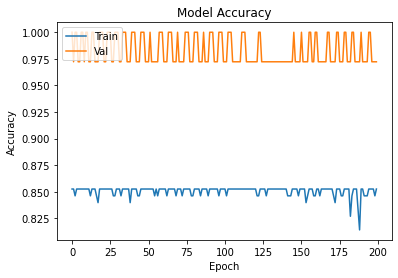

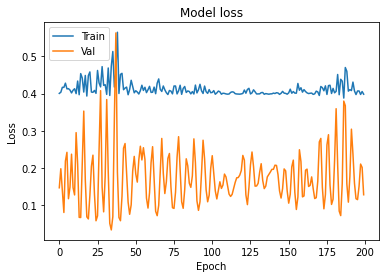

In [338]:
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [313]:
print(whole_column['part_features_l6'])

KeyError: ignored

In [321]:
name = ['all_lane_1.pkl', 'all_lane_2.pkl', 'all_lane_3.pkl', 'all_lane_4.pkl', 
        'all_lane_5.pkl','all_lane_6.pkl','part_lane_1.pkl', 'part_lane_2.pkl',
        'part_lane_3.pkl', 'part_lane_4.pkl', 'part_lane_5.pkl', 'all_lane_all.pkl',
        'part_lane_all.pkl']

for i in name:
  f = open(i, "rb")
  output = pickle.load(f)
  for k, v in output.items():
    print(v['a'])

1.0
1.0
0.8333333134651184
1.0
1.0
1.0
0.8333333134651184
0.1666666716337204
0.6666666865348816
0.5
0.5
0.6388888955116272
